In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv
/kaggle/input/costa-rican-household-poverty-prediction/codebook.csv
/kaggle/input/costa-rican-household-poverty-prediction/train.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/codebook.xlsx
/kaggle/input/costa-rican-household-poverty-prediction/train.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv.zip


In [34]:
pd.set_option('display.max_rows', None) # ... 데이터 생략 없앰
pd.set_option('display.max_columns', None) # ... 데이터 생략 없앰
train = pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/train.csv')

In [35]:
test = pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/test.csv')

In [36]:
train.shape  , test.shape

((9557, 143), (23856, 142))

In [37]:
train.describe(include='all')

Id          v2a1       hacdor        rooms       hacapo  \
count           9557  2.697000e+03  9557.000000  9557.000000  9557.000000   
unique          9557           NaN          NaN          NaN          NaN   
top     ID_7dc1a3609           NaN          NaN          NaN          NaN   
freq               1           NaN          NaN          NaN          NaN   
mean             NaN  1.652316e+05     0.038087     4.955530     0.023648   
std              NaN  1.504571e+05     0.191417     1.468381     0.151957   
min              NaN  0.000000e+00     0.000000     1.000000     0.000000   
25%              NaN  8.000000e+04     0.000000     4.000000     0.000000   
50%              NaN  1.300000e+05     0.000000     5.000000     0.000000   
75%              NaN  2.000000e+05     0.000000     6.000000     0.000000   
max              NaN  2.353477e+06     1.000000    11.000000     1.000000   

               v14a       refrig         v18q        v18q1         r4h1  \
count   9557.000000  9557.000000  9557.000000  2215.000000  9557.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.994768     0.957623     0.231767     1.404063     0.385895   
std        0.072145     0.201459     0.421983     0.763131     0.680779   
min        0.000000     0.000000     0.000000     1.000000     0.000000   
25%        1.000000     1.000000     0.000000     1.000000     0.000000   
50%        1.000000     1.000000     0.000000     1.000000     0.000000   
75%        1.000000     1.000000     0.000000     2.000000     1.000000   
max        1.000000     1.000000     1.000000     6.000000     5.000000   

               r4h2         r4h3         r4m1         r4m2         r4m3  \
count   9557.000000  9557.000000  9557.000000  9557.000000  9557.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       1.559171     1.945066     0.399184     1.661714     2.060898   
std        1.036574     1.188852     0.692460     0.933052     1.206172   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        1.000000     1.000000     0.000000     1.000000     1.000000   
50%        1.000000     2.000000     0.000000     1.000000     2.000000   
75%        2.000000     3.000000     1.000000     2.000000     3.000000   
max        8.000000     8.000000     6.000000     6.000000     8.000000   

               r4t1         r4t2         r4t3       tamhog       tamviv  \
count   9557.000000  9557.000000  9557.000000  9557.000000  9557.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.785079     3.220885     4.005964     3.999058     4.094590   
std        1.047559     1.440995     1.771202     1.772216     1.876428   
min        0.000000     1.000000     1.000000     1.000000     1.000000   
25%        0.000000     2.000000     3.000000     3.000000     3.000000   
50%        0.000000     3.000000     4.000000     4.000000     4.000000   
75%        1.000000     4.000000     5.000000     5.000000     5.000000   
max        7.000000    11.000000    13.000000    13.000000    15.000000   

           escolari      rez_esc       hhsize  paredblolad  paredzocalo  \
count   9557.000000  1629.000000  9557.000000  9557.000000  9557.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       7.20

In [38]:
train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [39]:
train[['Id']].isnull().sum() # null 값을 더했는데 0 이면, Null 이 없다는것이다.

Id    0
dtype: int64

In [40]:
train.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1              7342
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
paredother            0
pisomoscer            0
pisocemento           0
pisoother             0
pisonatur             0
pisonotiene           0
pisomadera            0
techozinc             0
techoentrepiso        0
techocane             0
techootro             0
cielorazo       

In [41]:
train  = train.dropna(axis='columns')
train.columns

Index(['Id', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1',
       'r4h2', 'r4h3',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'agesq', 'Target'],
      dtype='object', length=138)

In [42]:
train.columns

Index(['Id', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1',
       'r4h2', 'r4h3',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'agesq', 'Target'],
      dtype='object', length=138)

In [43]:
## refrig, tamhog, hhsize, public, idhogar, dependency, hogar_total, overcrowding, bedrooms, agesq , Target

In [44]:
train = train[['refrig', 'tamhog', 'hhsize', 'public', 'idhogar', 'dependency', 'hogar_total', 'overcrowding', 'bedrooms', 'agesq' , 'Target']]
train

refrig  tamhog  hhsize  public    idhogar dependency  hogar_total  \
0          1       1       1       1  21eb7fcc1         no            1   
1          1       1       1       1  0e5d7a658          8            1   
2          1       1       1       1  2c7317ea8          8            1   
3          1       4       4       1  2b58d945f        yes            4   
4          1       4       4       1  2b58d945f        yes            4   
5          1       4       4       1  2b58d945f        yes            4   
6          1       4       4       1  2b58d945f        yes            4   
7          1       4       4       1  d6dae86b7        yes            4   
8          1       4       4       1  d6dae86b7        yes            4   
9          1       4       4       1  d6dae86b7        yes            4   
10         1       4       4       1  d6dae86b7        yes            4   
11         1       2       2       1  bb2094100        yes            2   
12         1       2       2       1  bb2094100        yes            2   
13         1       2       2       1  c51f9c774        yes            2   
14         1       2       2       1  c51f9c774        yes            2   
15         1       4       4       1  6893e65ca          3            4   
16         1       4       4       1  6893e65ca          3            4   
17         1       4       4       1  6893e65ca          3            4   
18         1       4       4       1  6893e65ca          3            4   
19         1       2       2       1  d29058053         no            2   
20         1       2       2       1  d29058053         no            2   
21         1       2       2       1  ec0e8edce          8            2   
22         1       2       2       1  ec0e8edce          8            2   
23         1       3       3       1  3e16fab89         no            3   
24         1       3       3       1  3e16fab89         no            3   
25         1       3       3       1  3e16fab89         no            3   
26         1       1       1       1  1e84a2ac8         no            1   
27         1       3       3       1  759df0194         .5            3   
28         1       3       3       1  759df0194         .5            3   
29         1       3       3       1  759df0194         .5            3   
30         1       2       2       1  f2fcf00fd         no            2   
31         1       2       2       1  f2fcf00fd         no            2   
32         1       5       5       1  cb6bb28dd        .25            5   
33         1       5       5       1  cb6bb28dd        .25            5   
34         1       5       5       1  cb6bb28dd        .25            5   
35         1       5       5       1  cb6bb28dd        .25            5   
36         1       5       5       1  cb6bb28dd        .25            5   
37         1       3       3       1  cbf24a06c         .5            3   
38         1       3       3       1  cbf24a06c         .5            3   
39         1       3       3       1  cbf24a06c         .5            3   
40         1       2       2       1  922a1f87a         no            2   
41         1       2       2       1  922a1f87a         no            2   
42         1       3       3       1  a57a1f2f4          2            3   
43         1       3       3       1  a57a1f2f4          2            3   
44         1       3       3       1  a57a1f2f4          2            3   
45         1       2       2       1  9b084b23d          8            2   
46         1       2       2       1  9b084b23d          8            2   
47         1       3       3       1  6ddd55b3e         .5            3   
48         1       3       3       1  6ddd55b3e         .5            3   
49         1       3       3       1  6ddd55b3e         .5            3   
50         1       4       4       1  652a7ffa0        yes            4   
51         1       4       4       1  652a7ffa0        yes            4   
52         1       4       4   

* 연속형 : refrig , dependency , overcrowding , bedrooms , 
* 분류형 : tamhog , hhsize , hogar_total , 
* 제외 : idhogar , agesq , 

In [45]:
train['tamhog'].value_counts()

4     2451
3     2258
5     1590
2     1362
6      819
1      386
7      364
8       96
9       90
10      60
11      44
12      24
13      13
Name: tamhog, dtype: int64

In [46]:
train_feature  = train[['refrig', 'public', 'dependency', 'overcrowding', 'bedrooms', 'tamhog', 'hhsize', 'hogar_total']]
train_feature.shape
train_feature['dependency']

0              no
1               8
2               8
3             yes
4             yes
5             yes
6             yes
7             yes
8             yes
9             yes
10            yes
11            yes
12            yes
13            yes
14            yes
15              3
16              3
17              3
18              3
19             no
20             no
21              8
22              8
23             no
24             no
25             no
26             no
27             .5
28             .5
29             .5
30             no
31             no
32            .25
33            .25
34            .25
35            .25
36            .25
37             .5
38             .5
39             .5
40             no
41             no
42              2
43              2
44              2
45              8
46              8
47             .5
48             .5
49             .5
50            yes
51            yes
52            yes
53            yes
54            yes
55        

In [47]:
train_feature['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
1.3333334      84
.40000001      84
2.5            77
5              24
.80000001      18
1.25           18
3.5            18
2.25           13
.71428573      12
.83333331      11
1.75           11
1.2            11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [48]:
# train['dependency'] = train['dependency'].replace(to_replace='yes',value=2)

In [49]:
train_feature['dependency']=train_feature['dependency'].replace(to_replace='yes', value=2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
train_feature['dependency']=train_feature['dependency'].replace(to_replace='no', value=6)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
train_feature['dependency'] 

0               6
1               8
2               8
3               2
4               2
5               2
6               2
7               2
8               2
9               2
10              2
11              2
12              2
13              2
14              2
15              3
16              3
17              3
18              3
19              6
20              6
21              8
22              8
23              6
24              6
25              6
26              6
27             .5
28             .5
29             .5
30              6
31              6
32            .25
33            .25
34            .25
35            .25
36            .25
37             .5
38             .5
39             .5
40              6
41              6
42              2
43              2
44              2
45              8
46              8
47             .5
48             .5
49             .5
50              2
51              2
52              2
53              2
54              2
55        

In [52]:
train_feature.corr()

refrig    public  overcrowding  bedrooms    tamhog    hhsize  \
refrig        1.000000  0.064289     -0.113158  0.103223 -0.026784 -0.026784   
public        0.064289  1.000000     -0.003372  0.021019  0.000179  0.000179   
overcrowding -0.113158 -0.003372      1.000000 -0.392736  0.585560  0.585560   
bedrooms      0.103223  0.021019     -0.392736  1.000000  0.357266  0.357266   
tamhog       -0.026784  0.000179      0.585560  0.357266  1.000000  1.000000   
hhsize       -0.026784  0.000179      0.585560  0.357266  1.000000  1.000000   
hogar_total  -0.026784  0.000179      0.585560  0.357266  1.000000  1.000000   

              hogar_total  
refrig          -0.026784  
public           0.000179  
overcrowding     0.585560  
bedrooms         0.357266  
tamhog           1.000000  
hhsize           1.000000  
hogar_total      1.000000

In [53]:
train_heatmap = pd.concat([train['Target'],train_feature], axis='columns')

In [54]:
train_heatmap.corr()

Target    refrig    public  overcrowding  bedrooms    tamhog  \
Target        1.000000  0.126792  0.009074     -0.289110  0.166943 -0.147642   
refrig        0.126792  1.000000  0.064289     -0.113158  0.103223 -0.026784   
public        0.009074  0.064289  1.000000     -0.003372  0.021019  0.000179   
overcrowding -0.289110 -0.113158 -0.003372      1.000000 -0.392736  0.585560   
bedrooms      0.166943  0.103223  0.021019     -0.392736  1.000000  0.357266   
tamhog       -0.147642 -0.026784  0.000179      0.585560  0.357266  1.000000   
hhsize       -0.147642 -0.026784  0.000179      0.585560  0.357266  1.000000   
hogar_total  -0.147642 -0.026784  0.000179      0.585560  0.357266  1.000000   

                hhsize  hogar_total  
Target       -0.147642    -0.147642  
refrig       -0.026784    -0.026784  
public        0.000179     0.000179  
overcrowding  0.585560     0.585560  
bedrooms      0.357266     0.357266  
tamhog        1.000000     1.000000  
hhsize        1.000000     1.000000  
hogar_total   1.000000     1.000000

In [55]:
import seaborn as sns

<AxesSubplot:>

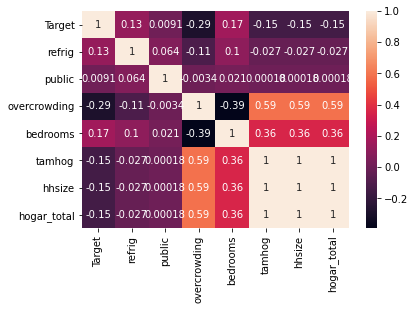

In [56]:
sns.heatmap(train_heatmap.corr(),annot=True)

In [57]:
from sklearn import preprocessing

In [58]:
train_onehot = pd.get_dummies(train_feature, columns=['tamhog', 'hhsize', 'hogar_total'])
train_onehot.shape

(9557, 44)

In [59]:
scaler = preprocessing.StandardScaler()

In [60]:
scaler.fit(train_onehot)
X = scaler.transform(train_onehot)
X.shape

(9557, 44)

In [61]:
Y = train['Target']
Y.shape

(9557,)

In [62]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X,Y)

LGBMClassifier()

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
params  = {'max_depth': [10,15,20], 
           'min_child_samples':[20,40,60],
           'subsample':[0.8,1]
          }

In [65]:
grid = GridSearchCV(lgbm,param_grid=params)
grid.fit(X,Y)


GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_child_samples': [20, 40, 60],
                         'subsample': [0.8, 1]})

In [66]:
grid.best_score_ , grid.best_params_

(0.619021235787524,
 {'max_depth': 15, 'min_child_samples': 40, 'subsample': 0.8})

In [67]:
lgbm_grid = LGBMClassifier(max_depth=15,min_child_sample=40,subsample=0.8 )

In [68]:
lgbm_grid.fit(X,Y)

LGBMClassifier(max_depth=15, min_child_sample=40, subsample=0.8)

In [69]:
lgbm_grid.score(X,Y)

0.6992780161138432

# Apply KFold
class sklearn.model_selection.RepeatedStratifiedKFold(*, n_splits=5, n_repeats=10, random_state=None)

sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)

In [85]:
from sklearn.model_selection import RepeatedStratifiedKFold
kf = RepeatedStratifiedKFold(n_splits=10,n_repeats=5 )

In [86]:
from sklearn.model_selection import cross_val_score
n_score = cross_val_score(lgbm_grid,X , Y , scoring='accuracy' , cv=kf)
n_score , n_score.shape

[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown pa

(array([0.66945607, 0.68514644, 0.68305439, 0.69142259, 0.68410042,
        0.67573222, 0.66945607, 0.66492147, 0.68272251, 0.68481675,
        0.68096234, 0.69560669, 0.67887029, 0.68305439, 0.67677824,
        0.67991632, 0.68828452, 0.67853403, 0.66596859, 0.69319372,
        0.67887029, 0.67364017, 0.68200837, 0.68619247, 0.68619247,
        0.68933054, 0.68305439, 0.67853403, 0.67434555, 0.68062827,
        0.68410042, 0.67991632, 0.68828452, 0.68828452, 0.68096234,
        0.67154812, 0.68514644, 0.67958115, 0.68167539, 0.66806283,
        0.66527197, 0.68723849, 0.68619247, 0.67468619, 0.67573222,
        0.68828452, 0.68828452, 0.68900524, 0.67015707, 0.66701571]),
 (50,))

In [88]:
import numpy as np
np.mean(n_score) , np.std(n_score)

(0.680484501303424, 0.00757210820939641)

In [70]:
lgbm_grid.feature_importances_

array([ 682,  953, 3098, 3196, 1816,  168,  261,  333,  391,  344,  266,
        152,  117,  110,   59,   21,   33,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

Index(['refrig', 'public', 'dependency', 'overcrowding', 'bedrooms',
       'tamhog_1', 'tamhog_2', 'tamhog_3', 'tamhog_4', 'tamhog_5', 'tamhog_6',
       'tamhog_7', 'tamhog_8', 'tamhog_9', 'tamhog_10', 'tamhog_11',
       'tamhog_12', 'tamhog_13', 'hhsize_1', 'hhsize_2', 'hhsize_3',
       'hhsize_4', 'hhsize_5', 'hhsize_6', 'hhsize_7', 'hhsize_8', 'hhsize_9',
       'hhsize_10', 'hhsize_11', 'hhsize_12', 'hhsize_13', 'hogar_total_1',
       'hogar_total_2', 'hogar_total_3', 'hogar_total_4', 'hogar_total_5',
       'hogar_total_6', 'hogar_total_7', 'hogar_total_8', 'hogar_total_9',
       'hogar_total_10', 'hogar_total_11', 'hogar_total_12', 'hogar_total_13'],
      dtype='object')


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

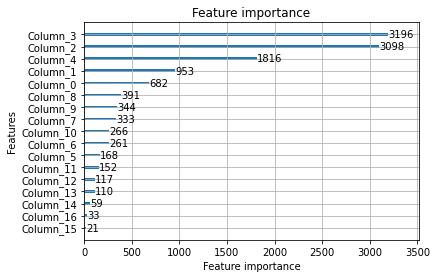

In [71]:
from lightgbm import plot_importance
print(train_onehot.columns)
plot_importance(lgbm_grid)

In [72]:
Y_pred = lgbm_grid.predict(X)
from sklearn import metrics
print(metrics.classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           1       0.79      0.26      0.39       755
           2       0.56      0.33      0.42      1597
           3       0.67      0.17      0.27      1209
           4       0.71      0.96      0.82      5996

    accuracy                           0.70      9557
   macro avg       0.68      0.43      0.47      9557
weighted avg       0.69      0.70      0.65      9557



In [73]:
lgbm.score(X,Y)

0.6987548393847441

In [74]:
Y_pred = lgbm.predict(X)

In [75]:
from sklearn import metrics
print(metrics.classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           1       0.78      0.27      0.40       755
           2       0.56      0.32      0.41      1597
           3       0.66      0.17      0.27      1209
           4       0.71      0.96      0.82      5996

    accuracy                           0.70      9557
   macro avg       0.68      0.43      0.47      9557
weighted avg       0.69      0.70      0.65      9557

